In [2]:
import stockcorr as sc
from re import I
import datetime
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community.centrality import girvan_newman
from scipy.sparse.csgraph import minimum_spanning_tree
import os 
from networkx.algorithms import community

In [3]:
stockdf = pd.read_csv('../data/stock_market_data/stockdf.csv', index_col=0)
startlen = len(stockdf.columns)
stockdf = stockdf.dropna(axis=1, how='all')

In [4]:
def mst_and_relabel(stockdf):
    A = sc.get_corr_matrix(stockdf, threshold=0, from_file=False)
    mst = sc.min_spanning_tree(A)
    G = sc.relabel_graph(mst, stockdf.columns)
    return G

calculating corr matrix
A has 1458 nan values
calculating corr matrix
A has 1356 nan values


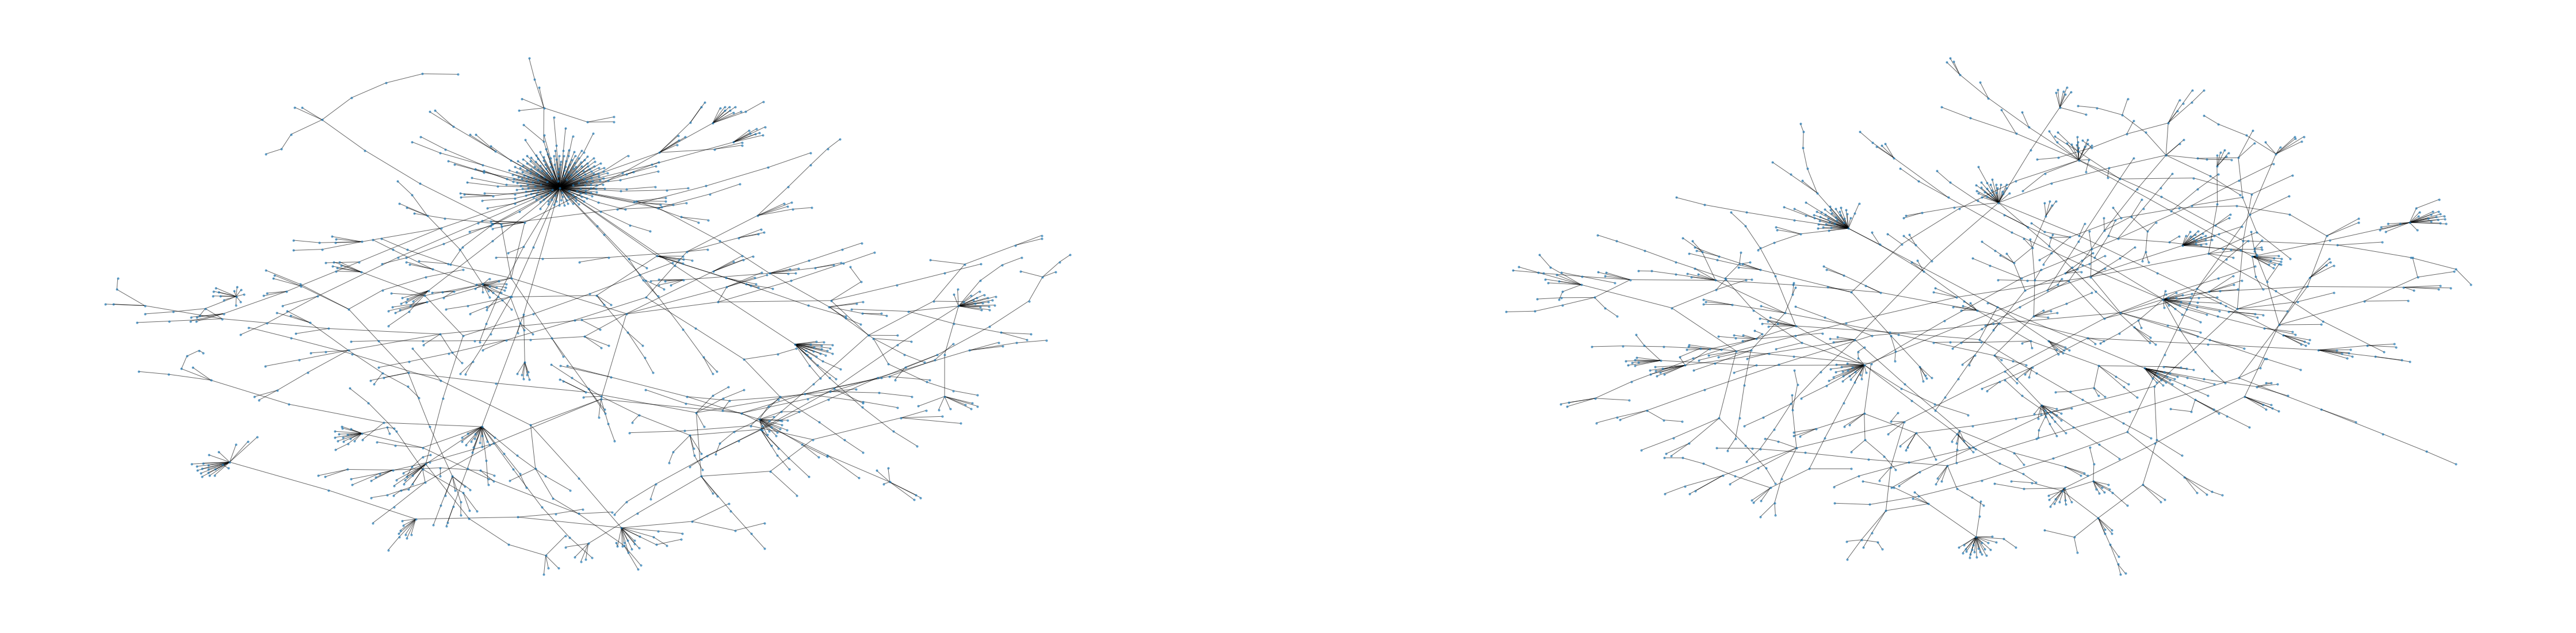

In [5]:
# create subset of stockdf

fig, ax = plt.subplots(1,2, figsize=(80,20))
G = mst_and_relabel(stockdf)
nx.draw(G, with_labels=False, node_size=10, ax = ax[0], alpha=.6, width=1)

without_bsac = stockdf.drop(columns=['BSAC'])
G_without_bsac = mst_and_relabel(without_bsac)
nx.draw(G_without_bsac, with_labels=False, node_size=10, ax = ax[1], alpha=.6, width=1)

plt.show()


In [ ]:
edges_dict = {i: len(G[i]) for i in G.nodes()}
## get the key with the highest value item
key = max(edges_dict, key=edges_dict.get)
print(key)
print(len(G[key]))
# print(G[key])

In [27]:
A = sc.get_corr_matrix(without_bsac, threshold=0.90, from_file=False)
corr_net = nx.from_numpy_matrix(A, create_using=nx.Graph)
corr_net = sc.relabel_graph(corr_net, without_bsac.columns)

# nx.draw(corr_net, with_labels=False, node_size=10, alpha=.6, width=1)



calculating corr matrix
A has 1356 nan values


In [26]:
# connected = corr_net
# connected_mst = G_without_bsac
# node_to_add = []


# for i in connected.nodes():
#     if len(connected[i]) == 0:
#         # print(i, 'isolated stock')
#         edges_ = connected_mst.edges(i)
#         # print(edges_, 'edges in mst of stock')
#         max = 0
#         for y in edges_:
#             if abs(connected_mst.get_edge_data(y[0], y[1])['weight']) > max:
#                 max = abs(connected_mst.get_edge_data(y[0], y[1])['weight'])
#                 key = y[1]
#         # print(max, 'max')
#         # print(key, 'key')
#         node_to_add.append((i,key))

# for edge in node_to_add:
#     connected.add_edge(edge[0], edge[1], weight=connected_mst.get_edge_data(edge[0], edge[1])['weight'])

        
# nx.is_connected(connected)
# # nx.draw(connected, with_labels=False, node_size=10, alpha=.6, width=1)

False

In [37]:
looked_at_list= []
subgraphs = {}
first_node = corr_net.nodes().tolist()[0]


print(first_node)

test = corr_net.bfs_tree(first_node)
test





A


AttributeError: 'Graph' object has no attribute 'bfs_tree'